In [17]:
import pandas as pd
import numpy  as np
import matplotlib as plt

In [18]:
df = pd.read_csv('./dataset_02_11.csv', sep=',')
df1 = df[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x']]

In [84]:
#df1.corr().round(4)

In [19]:
import seaborn as sns

sns.set_palette("Accent")
sns.set_style("darkgrid")


<AxesSubplot:title={'center':'Duração'}, xlabel='Segundos'>

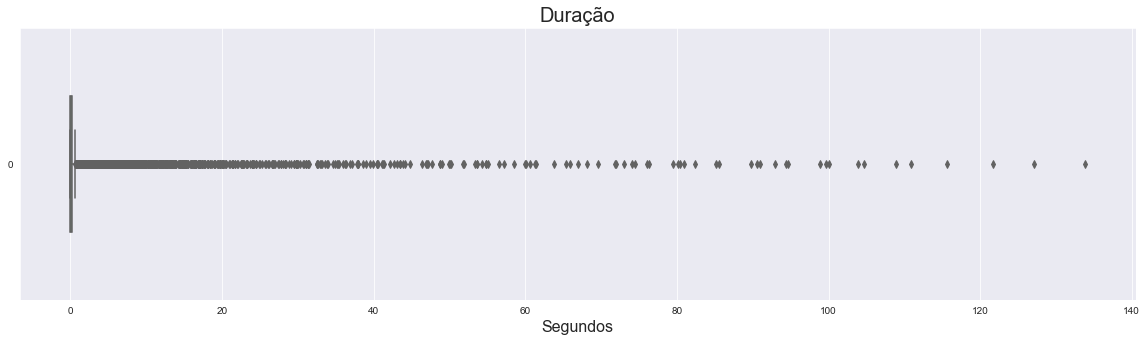

In [20]:
ax = sns.boxplot(data=df1['duration'], orient='h', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Duração', fontsize=20)
ax.set_xlabel('Segundos', fontsize=16)
ax

C:\Users\Luan Siqueira\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição em frequência'}, xlabel='Duração', ylabel='Density'>

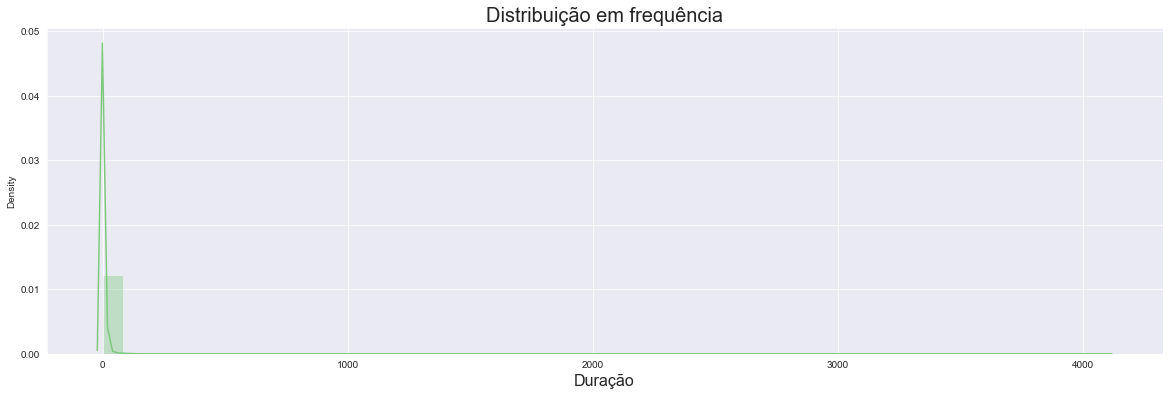

In [5]:
ax = sns.distplot(df1['duration'])
ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição em frequência', fontsize=20)
ax.set_xlabel('Duração', fontsize=16)
ax

In [83]:
#ax = sns.pairplot(df1, y_vars='duration', x_vars=['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x'], kind='reg', height=5)
#ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
#ax

In [34]:
#df1 = df.sort_values(by='AppId', ascending=True)
#df1['duration'] = pd.to_numeric(df1['duration'])
df1 = df1.select_dtypes(exclude=['object'])
#df1 = df1.drop(columns= ["Unnamed: 0"], axis = 1)

#df1 = df1.sort_values(by='AppId', ascending=True)
#df1['AppId'] = pd.to_numeric(df1['AppId'])
#df1 = df1.select_dtypes(exclude=['object'])
df1=df1.dropna()

In [35]:
import numpy as np

#dados = np.log(df1[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','number_of_lines_kernel','occupancy','input_size','block_x']] + 0.01)
dados = np.log(df1[['compute_version','registers','smem','cmem','number_of_lines_kernel','occupancy','input_size','block_x']] + 1)
dados['duration'] = np.log(df1['duration'])
dados['AppId'] = df1['AppId']
dados

,compute_version,registers,smem,cmem,number_of_lines_kernel,occupancy,input_size,block_x,duration,AppId
0,1.386294,3.496508,0.00000,5.855072,1.94591,3.931826,5.549076,2.197225,-6.690976,1.0
1,1.386294,3.496508,0.00000,5.855072,1.94591,3.931826,6.240276,2.197225,-4.601776,1.0
2,1.386294,3.496508,0.00000,5.855072,1.94591,3.931826,6.645091,2.197225,-3.393289,1.0
3,1.386294,3.496508,0.00000,5.855072,1.94591,3.931826,6.932448,2.197225,-2.530754,1.0
4,1.386294,3.496508,0.00000,5.855072,1.94591,3.931826,7.155396,2.197225,-1.866171,1.0
...,...,...,...,...,...,...,...,...,...,...
8454,1.824549,3.496508,9.70461,5.843544,3.73767,3.465736,19.343583,4.859812,-3.320936,9.0
8455,1.824549,3.496508,9.70461,5.843544,3.73767,3.465736,19.360112,4.859812,-3.302448,9.0
8456,1.824549,3.496508,9.70461,5.843544,3.73767,3.465736,19.376372,4.859812,-3.287128,9.0
8457,1.824549,3.496508,9.70461,5.843544,3.73767,3.465736,19.392373,4.859812,-3.265339,9.0


C:\Users\Luan Siqueira\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição em frequência'}, xlabel='Duração', ylabel='Density'>

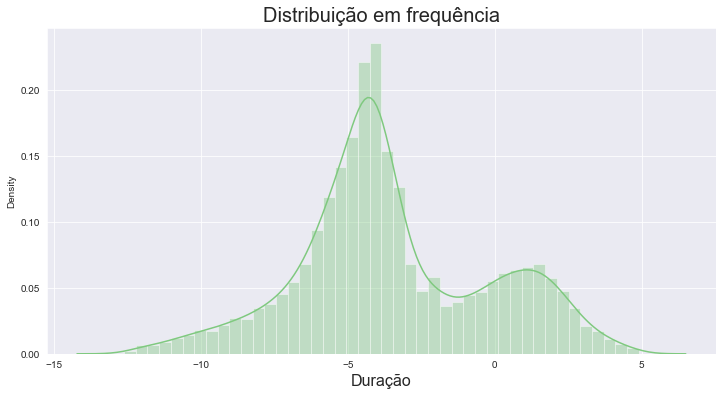

In [30]:
ax = sns.distplot(dados['duration'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição em frequência', fontsize=20)
ax.set_xlabel('Duração', fontsize=16)
ax

In [8]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

In [36]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

In [38]:
for idApp in range(1,10):
    idApp = float(idApp)
    X_train = dados[dados['AppId'] != idApp]
    Y_train = dados[dados['AppId'] != idApp]['duration']
    X_test = dados[dados['AppId'] == idApp]
    Y_test = dados[dados['AppId'] == idApp]['duration']

    #xTrain = sm.add_constant(X_train)

    #modelo_statsModels = sm.OLS(Y_train, xTrain, hasconst=True).fit()
    #print(modelo_statsModels.summary())
    #yTrain = np.log(Y_train + 0.0000001)
    #yTest = np.log(Y_test + 0.0000001)
    #xTrain = np.log(X_train + 0.0000001)
    #xTest = np.log(X_test + 0.01)
    yTrain = np.log(Y_train + 1)
    yTest = np.log(Y_test + 1)
    
    modelo = LinearRegression()
    modelo.fit(X_train, yTrain)
    
    y_pred = modelo.predict(X_test)
    
    print('Application: ', idApp, ' Percentage:', mean_absolute_percentage_error(yTest, y_pred))

C:\Users\Luan Siqueira\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').